# **PRE-PROCESSING DATA TIDAK TERSTRUKTUR**

## **1. Data Citra**

### **1.1. Import Library**

In [11]:
import os
import cv2
import numpy as np
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnetv2

### **1.2. Import gambar dengan method `.imread()` dari package `cv2`**

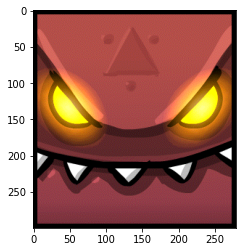

In [12]:
img = cv2.imread("/content/drive/MyDrive/Saved-Pictures/IMG20200529075545 (1).jpg")
plt.imshow(img)

### **1.3. Mengubah komposisi warna dari BGR menjadi RGB menggunakan method `.cvtColor()`**

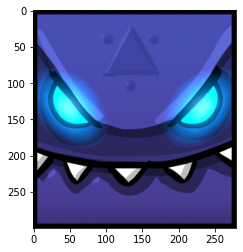

In [13]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

### **1.4. Membagi channel warna dari `img_rgb` ke dalam variabel `r`, `g`, `b`, yang merepresentasikan warna channel mereka yaitu red, green, dan blue menggunakan method `.split()`**

Text(0.5, 1.0, 'img(B)')

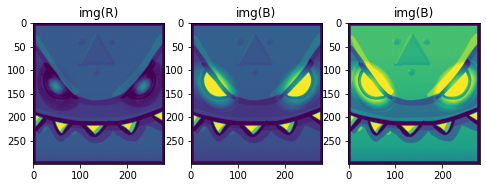

In [28]:
r, g, b = cv2.split(img_rgb)
fig, ax = plt.subplots(1, 3, figsize=(8, 8))

ax[0].imshow(r)
ax[0].set_title('img(R)')

ax[1].imshow(g)
ax[1].set_title('img(B)')

ax[2].imshow(b)
ax[2].set_title('img(B)')

### **1.5. Menampilkan `img_rgb` dalam bentuk array dua dimensi menggunakan method `.img_to_array()`**

In [15]:
img_array = img_to_array(img_rgb)
print(img_array)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


### **1.6. Mengubah komposisi channel warna `img` dan `img_rgb` menjadi beberapa jenis seperti Grayscale dengan `.COLOR_BGR2GRAY` dan `.COLOR_GRAY2RGB` serta HSV dengan `.COLOR_RGB2HSV`**

Text(0.5, 1.0, 'img(HSV)')

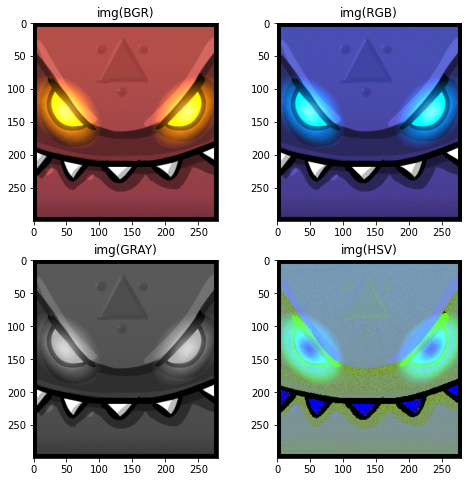

In [16]:
# grayscale
img_grayscale_temp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_grayscale = cv2.cvtColor(img_grayscale_temp, cv2.COLOR_GRAY2RGB)

# hsv
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# plotting
fig = plt.figure(num=None, figsize=(8, 8))

ax = fig.add_subplot(2, 2, 1)
plt.imshow(img)
plt.title('img(BGR)')

ax = fig.add_subplot(2, 2, 2)
plt.imshow(img_rgb)
plt.title('img(RGB)')

ax = fig.add_subplot(2, 2, 3)
plt.imshow(img_grayscale)
plt.title('img(GRAY)')

ax = fig.add_subplot(2, 2, 4)
plt.imshow(img_hsv)
plt.title('img(HSV)')

### **1.7. Menampilkan histogram dari citra yang telah diubah pada langkah `1.6`**

Text(0.5, 1.0, 'img(HSV)')

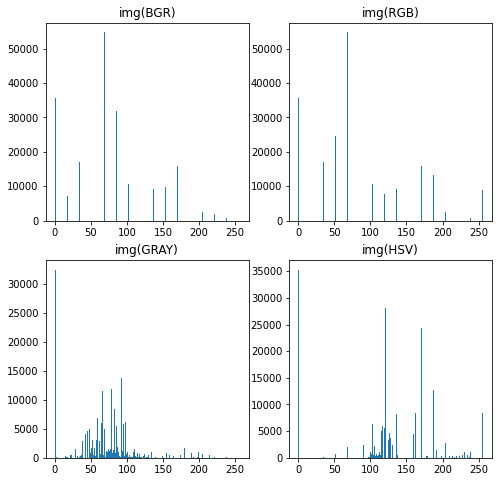

In [17]:
# grayscale
img_grayscale_temp = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_grayscale = cv2.cvtColor(img_grayscale_temp, cv2.COLOR_GRAY2RGB)

# hsv
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# plotting
fig = plt.figure(num=None, figsize=(8, 8))

ax = fig.add_subplot(2, 2, 1)
plt.hist(img.ravel(),256,[0,256])
plt.title('img(BGR)')

ax = fig.add_subplot(2, 2, 2)
plt.hist(img_rgb.ravel(),256,[0,256])
plt.title('img(RGB)')

ax = fig.add_subplot(2, 2, 3)
plt.hist(img_grayscale.ravel(),256,[0,256])
plt.title('img(GRAY)')

ax = fig.add_subplot(2, 2, 4)
plt.hist(img_hsv.ravel(),256,[0,256])
plt.title('img(HSV)')

### **1.8. Melakukan pengubahan ukuran citra dengan method `.resize()`**

Text(0.5, 1.0, 'img(resize)')

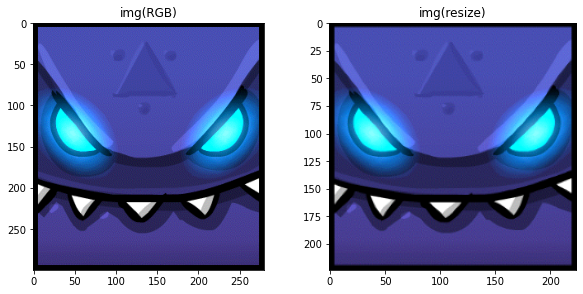

In [18]:
img_resize = cv2.resize(img_rgb, (224, 224))

fig = plt.figure(num=None, figsize=(10, 10))

ax = fig.add_subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('img(RGB)')

ax = fig.add_subplot(2, 2, 2)
plt.imshow(img_resize)
plt.title('img(resize)')

### **1.9. Membuat direktori `augmented_dir`**

In [20]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Pengantar-Data-Mining'
augmented_dir = os.path.join(base_dir, 'augmented_result')
os.mkdir(augmented_dir)

### **1.10. Membuat generator untuk pemrosesan citra di dalam variabel `datagen`. Pada kasus ini, pemrosesan yang dilakukan adalah rotasi citra dengan range 45 dan penggeseran lebar citra sebesar 0.5**

In [21]:
datagen = ImageDataGenerator(
    rotation_range = 45,
    width_shift_range = 0.5
)

### **1.11. Import gambar yang ingin diproses dengan `path` yang diberikan, dengan ukuran gambar sebesar 150, serta komposisi channel warnanya adalah RGB**

In [22]:
path = "/content/drive/MyDrive/Saved-Pictures"
size = 150
dataset = []
image_dir = os.listdir(path)

image = io.imread(f"{path}/{image_dir[1]}")
image = Image.fromarray(image, 'RGB')
image = image.resize((size, size))
dataset.append(np.array(image))
x = np.array(dataset)

### **1.12. Perulangan untuk memproses gambar yang telah diimport kemudian disimpan di dalam direktori `augmented_result` yang telah dibuat sebelumnya, serta disimpan dengan nama file yang diberi prefix `aug_rslt` kemudian format file `.png`**

In [23]:
i = 0
for j in datagen.flow(x, batch_size=32, 
                      save_to_dir="/content/drive/MyDrive/Colab Notebooks/Pengantar-Data-Mining/augmented_result", 
                      save_prefix="aug_rslt", save_format=".png"):
  i += 1
  if i > 30:
    break

### **1.13. Melakukan denoising pada citra, yaitu proses menghilangan noise dengan menggunakan method `.GaussianBlur()`**

Text(0.5, 1.0, 'img(denoised)')

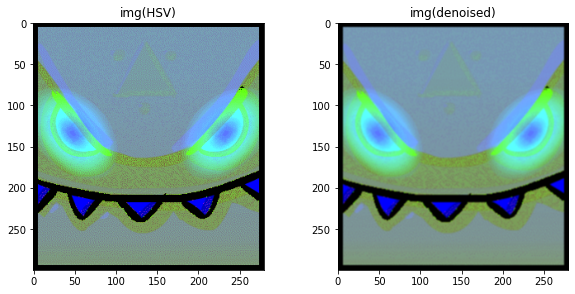

In [24]:
img_denoise = cv2.GaussianBlur(img_hsv, (3, 3), 0)
rgb_dst = cv2.fastNlMeansDenoisingColored(img_denoise, None, 10, 10, 7, 15)

fig = plt.figure(num=None, figsize=(10, 10))

ax = fig.add_subplot(2, 2, 1)
plt.imshow(img_hsv)
plt.title('img(HSV)')

ax = fig.add_subplot(2, 2, 2)
plt.imshow(img_denoise)
plt.title('img(denoised)')